In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_recall_curve, make_scorer, precision_score, recall_score, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


https://aws.amazon.com/blogs/machine-learning/predicting-customer-churn-with-amazon-machine-learning/

In [2]:
!wget http://amazon-sagemaker.com/datasets/DKD2e_data_sets.zip -O DKD2e_data_sets.zip

--2022-04-26 18:35:40--  http://amazon-sagemaker.com/datasets/DKD2e_data_sets.zip
Resolving amazon-sagemaker.com (amazon-sagemaker.com)... 13.227.92.115, 13.227.92.71, 13.227.92.86, ...
Connecting to amazon-sagemaker.com (amazon-sagemaker.com)|13.227.92.115|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://amazon-sagemaker.com/datasets/DKD2e_data_sets.zip [following]
--2022-04-26 18:35:41--  https://amazon-sagemaker.com/datasets/DKD2e_data_sets.zip
Connecting to amazon-sagemaker.com (amazon-sagemaker.com)|13.227.92.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1003616 (980K) [application/zip]
Saving to: ‘DKD2e_data_sets.zip’

DKD2e_data_sets.zip 100%[===================>] 980.09K  --.-KB/s    in 0.1s    

2022-04-26 18:35:41 (7.30 MB/s) - ‘DKD2e_data_sets.zip’ saved [1003616/1003616]



In [3]:
!unzip -o DKD2e_data_sets.zip

Archive:  DKD2e_data_sets.zip
 extracting: Data sets/adult.zip     
  inflating: Data sets/cars.txt      
  inflating: Data sets/cars2.txt     
  inflating: Data sets/cereals.CSV   
  inflating: Data sets/churn.txt     
  inflating: Data sets/ClassifyRisk  
  inflating: Data sets/ClassifyRisk - Missing.txt  
 extracting: Data sets/DKD2e data sets.zip  
  inflating: Data sets/nn1.txt       


In [4]:
data = pd.read_csv('Data sets/churn.txt')
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


#### Variables del dataset
- **State:** estado de Estados Unidos en el cual el cliente reside, indicado por una abreviatura de dos caracteres; por ejemplo, OH o NJ
- **Account Length:** número de días que la cuenta ha estado activa
- **Area Code:** código de área a tres digitos correspondiente al número telefónico del cliente
- **Phone:** los 7 digitos restantes del número telefónico del cliente
- **Int’l Plan:** indica si el cliente tiene un plan para llamdas internacionales: yes/no
- **VMail Plan:** indica si el cliente tiene la funcionalidad de buzón de voz: yes/no
- **VMail Message:** promedio de mensajes de voz por mes
- **Day Mins:** número total de minutos de llamadas realizadas durante el día
- **Day Calls:** número total de llamadas realizadas durante el día
- **Day Charge:** costo facturado por las llamadas realizadas durante el día
- **Eve Mins:** número total de minutos de llamadas realizadas durante la tarde
- **Eve Calls:** número total de llamadas realizadas durante la tarde
- **Eve Charge:** costo facturado por las llamadas realizadas durante la tarde
- **Night Mins:** número total de minutos de llamadas realizadas durante la noche
- **Night Calls:** número total de llamadas realizadas durante la noche
- **Night Charge:** costo facturado por las llamadas realizadas durante la noche
- **Intl Mins:** número total de minutos de llamadas internacionales realizadas
- **Intl Calls:** número total de llamadas internacionales realizadas
- **Intl Charge:** costo facturado por las llamadas internacionales realizadas
- **CustServ Calls:** número de llamadas realizadas a Servicio al Cliente
- **Churn?:** indica si el cliente abandona el servicio o no: true/false

#### Eliminar caracteres especiales y reemplazar espacios por guiones bajos

In [5]:
data.columns = [''.join (c if c.isalnum() else '_' for c in str(column)) for column in data.columns]
data.head()

,State,Account_Length,Area_Code,Phone,Int_l_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn_
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### Análisis exploratorio del dataset

#### Selección de columnas con las que nos interesa trabajar

In [6]:
columns = ['State', 'Account_Length', 'Area_Code', 'Int_l_Plan','VMail_Plan', 'VMail_Message', 
           'Day_Mins', 'Day_Calls','Eve_Mins', 'Eve_Calls', 'Night_Mins', 'Night_Calls', 
           'Intl_Mins', 'Intl_Calls', 'CustServ_Calls', 'Churn_']
data = data[columns]
data.head()

,State,Account_Length,Area_Code,Int_l_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,Intl_Mins,Intl_Calls,CustServ_Calls,Churn_
0,KS,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False.
1,OH,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False.
2,NJ,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False.
3,OH,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False.
4,OK,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False.


#### Entendiendo la distribución de las variables categóricas

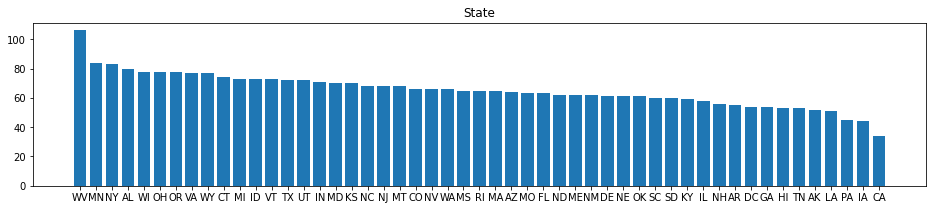

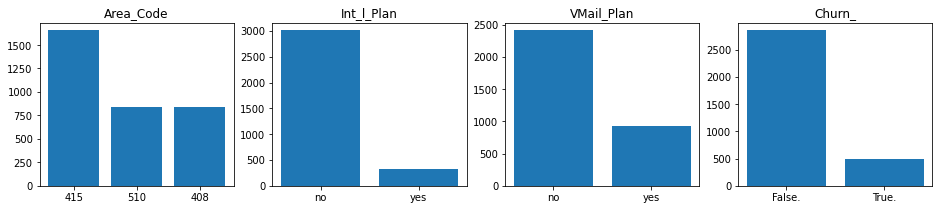

In [7]:
column = 'State'
fig1, ax = plt.subplots(1,1)
x=list(map(str,data[column].value_counts().index))
height=data[column].value_counts().values
ax.set_title(column)
ax.bar(x,height)
fig1.set_figheight(3)
fig1.set_figwidth(16)

columns = ['Area_Code', 'Int_l_Plan', 'VMail_Plan', 'Churn_']
fig2, axes = plt.subplots(1,len(columns))

for i, column in enumerate(columns, start=0):        
    ax = axes[i]
    ax.set_title(column)
    
    x=list(map(str,data[column].value_counts().index))
    height=data[column].value_counts().values
    ax.bar(x,height)
    
fig2.set_figheight(3)
fig2.set_figwidth(16)
plt.show()

#### Entendiendo la distribución de las variables numéricas

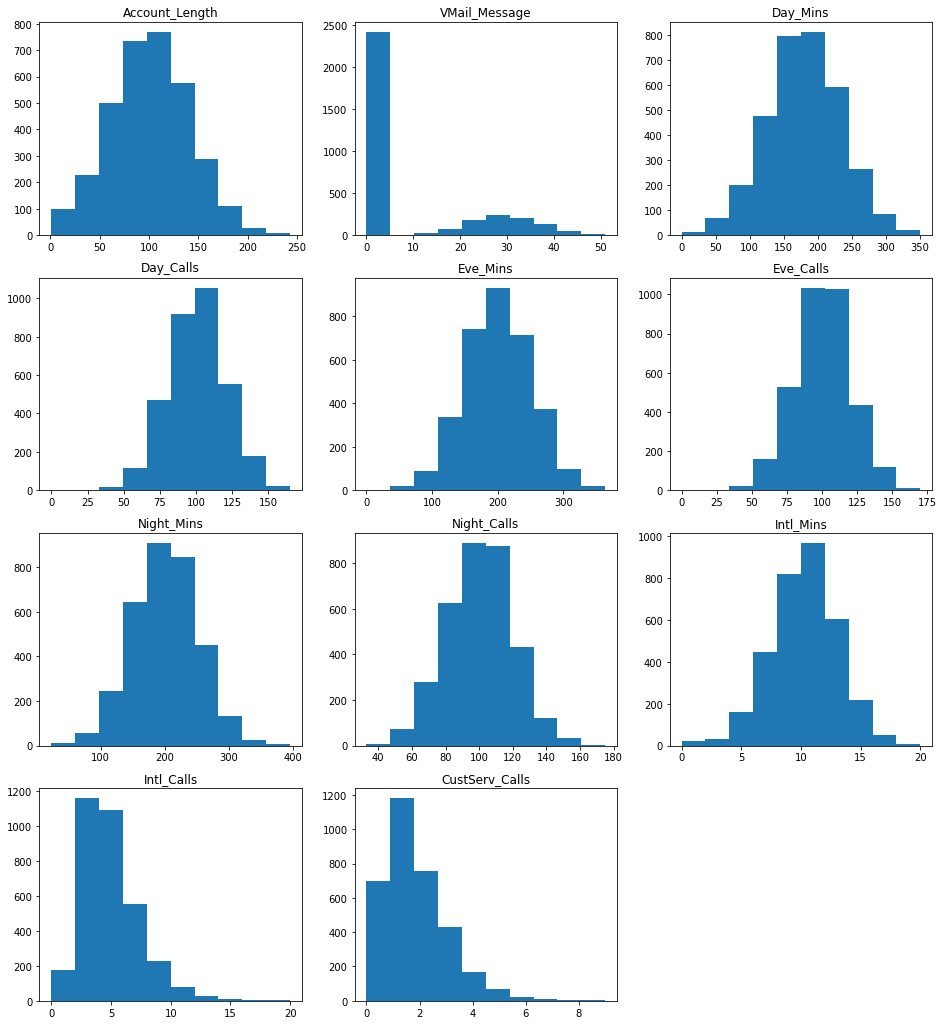

In [8]:
columns = ['Account_Length', 'VMail_Message', 'Day_Mins', 'Day_Calls','Eve_Mins', 'Eve_Calls',
           'Night_Mins', 'Night_Calls', 'Intl_Mins', 'Intl_Calls', 'CustServ_Calls']

cols=3
fig, axes = plt.subplots(round(len(columns)/cols),cols)

for i, column in enumerate(columns, start=1): 
    ax = axes[int((i-1-((i-1)%cols))/cols), (i-1)%cols]
    ax.set_title(column)
    ax.hist(data[column])

if len(columns) < axes.shape[0]*axes.shape[1]:
    axes[-1][-1].axis('off')
    
fig.set_figheight(18)
fig.set_figwidth(16)
plt.show()

### Preparación del dataset

#### Eliminación del . al final de la palabra False o True en la columna `Churn_` y renombrarla a `Churn`

In [9]:
data['Churn_']=data['Churn_'].str.replace('.','')
data.rename(columns={'Churn_':'Churn'}, inplace=True)
data.head()

/tmp/ipykernel_6056/3447263936.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['Churn_']=data['Churn_'].str.replace('.','')


,State,Account_Length,Area_Code,Int_l_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,Intl_Mins,Intl_Calls,CustServ_Calls,Churn
0,KS,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


#### One hot encoding de variables categoricas

In [10]:
columns = ['State','Area_Code']
encoder = OneHotEncoder().fit(data[columns])

In [11]:
transformed = encoder.transform(data[columns]).toarray()

In [12]:
data.drop(columns,axis=1, inplace=True)
data = pd.concat([data,pd.DataFrame(transformed, columns=encoder.get_feature_names())],axis=1)
data.head()

,Account_Length,Int_l_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,...,x0_UT,x0_VA,x0_VT,x0_WA,x0_WI,x0_WV,x0_WY,x1_408,x1_415,x1_510
0,128,no,yes,25,265.1,110,197.4,99,244.7,91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,107,no,yes,26,161.6,123,195.5,103,254.4,103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,137,no,no,0,243.4,114,121.2,110,162.6,104,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,84,yes,no,0,299.4,71,61.9,88,196.9,89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,75,yes,no,0,166.7,113,148.3,122,186.9,121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Reemplazar yes/no por 1/0 en columnas Int_l_Plan y VMail_Plan

In [13]:
data['Int_l_Plan'] = data['Int_l_Plan'].map(dict(yes=1, no=0))
data['VMail_Plan'] = data['VMail_Plan'].map(dict(yes=1, no=0))
data.head()

,Account_Length,Int_l_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,...,x0_UT,x0_VA,x0_VT,x0_WA,x0_WI,x0_WV,x0_WY,x1_408,x1_415,x1_510
0,128,0,1,25,265.1,110,197.4,99,244.7,91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,107,0,1,26,161.6,123,195.5,103,254.4,103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,137,0,0,0,243.4,114,121.2,110,162.6,104,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,84,1,0,0,299.4,71,61.9,88,196.9,89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,75,1,0,0,166.7,113,148.3,122,186.9,121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Reemplazar True/False por 1/0 en columna Churn

In [14]:
data['Churn'] = data['Churn'].map({'True': 1, 'False': 0})

#### Separar la etiqueta o target del resto de los datos

In [15]:
target = data[['Churn']]
data.drop(['Churn'], axis=1, inplace=True)

#### Dividir los datos para entrenamiento y validación

Verificamos que tan balanceado está nuestro dataset

In [16]:
round(target['Churn'].value_counts(normalize=True) * 100,1)

0    85.5
1    14.5
Name: Churn, dtype: float64

#### Y dividimos en train (80%) y test (20%), manteniendo las mismas proporciones de observaciones por cada clase

In [17]:
train_data, test_data, train_target, test_target = train_test_split(data, target, stratify=target, test_size=0.1)

In [18]:
print('Train: {0} records with clasess: 0={1[0]}% and 1={1[1]}%'.format(train_target.shape[0],
                                             round(train_target['Churn'].value_counts(normalize=True) * 100, 1)))

print('Test: {0} records with clasess: 0={1[0]}% and 1={1[1]}%'.format(test_target.shape[0],
                                             round(test_target['Churn'].value_counts(normalize=True) * 100, 1)))

Train: 2999 records with clasess: 0=85.5% and 1=14.5%
Test: 334 records with clasess: 0=85.6% and 1=14.4%


### Entrenamiento y selección del mejor modelo

Entrenamiento de tres modelos utilizando los siguientes algoritmos
- Gradient Boosting
- Random Forest
- Extra Trees

Para posteriormente seleccionar el mejor después de haber hecho un fine tuning de cada melo mediante un GridSearch

In [19]:
def plot_confusion_matrix(test_set, predictions, classes, title):
    classes=np.array(classes)
    cm = confusion_matrix(test_set, predictions)
    
    fig, (ax1,ax2) = plt.subplots(1,2, gridspec_kw={'width_ratios': [2, 3]})
    im = ax1.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax1.figure.colorbar(im, ax=ax1)
    
    # We want to show all ticks...
    ax1.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title="Confusion Matrix",
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax1.get_yticklabels(), rotation=90, ha="center", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax1.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tn+fp+fn+tp)
    precision = tp/(fp+tp)
    recall = tp/(fn+tp)
    specifity = tn/(tn+fp)
    
    ax2.axis('off')
    ax2.text(0,0.9, s='The overall model accuracy is {}% [ACCURACY]'.format(round(accuracy*100,2)), 
             size='12', ha='left', va='center')
    
    ax2.text(0,0.7, s='Out of the customers the model predicted as will churn, {}% will actually churn [PRECISION]'.format(round(precision*100,2)), 
             size='12', ha='left', va='center')
    
    ax2.text(0,0.5, s='The model will catch {}% of the customers who will actually churn [RECALL / SENSITIVITY]'.format(round(recall*100,2)), 
             size='12', ha='left', va='center')
    
    ax2.text(0,0.3, s='The model will catch {}% of the customers who will actually NOT churn [SPECIFITY]'.format(round(specifity*100,2)), 
             size='12', ha='left', va='center')
    
    fig.set_figheight(3)
    fig.set_figwidth(16)
    fig.suptitle(title, fontsize=16)
    plt.show()

In [20]:
def fine_tuner(clf, dataset, param_grid, scores, splits, refit_score, title):
    skf = StratifiedKFold(n_splits=splits)    

    grid_search = GridSearchCV(clf, param_grid, scoring=scores, refit=refit_score,
                               cv=skf, return_train_score=True, n_jobs=-1)

    grid_search.fit(dataset['x_train'], dataset['y_train']['Churn'].tolist())

    predictions = grid_search.predict(dataset['x_test'])

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)
    
    labels = ['Not Churn','Churn']
    plot_confusion_matrix(dataset['y_test'], predictions, labels, title)
    
    return grid_search

In [21]:
def operating_point_finder(clf, data, target, min_precision):
    predict_proba = getattr(clf, 'predict_proba', None)
    if callable(predict_proba):
        predictions = predict_proba(data)[:, 1]
        
        precision, recall, thresholds = precision_recall_curve(target, predictions)

        operating_point_idx = np.argmax(precision>=min_precision)
        
        plt.figure(num=None, figsize=(9, 5), facecolor='w', edgecolor='k')
        plt.plot(recall, precision)
        plt.plot(recall[operating_point_idx], precision[operating_point_idx], 'ro', 
                 label='Decision threshold: {}'.format(thresholds[operating_point_idx]))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend()
        plt.show()
        
        return thresholds[operating_point_idx], predictions

#### Random Forest

In [22]:
rf_clf = RandomForestClassifier(n_jobs = -1)

parameters = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 200, 300, 400, 500, 700],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20]
}

scores = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

data = {
    'x_train': train_data,
    'y_train': train_target,
    'x_test': test_data,
    'y_test': test_target
}

/home/ch/vscode/ch/repos/mlops-sagemaker/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ch/vscode/ch/repos/mlops-sagemaker/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ch/vscode/ch/repos/mlops-sagemaker/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ch/vscode/ch/repos/

Best params for recall_score
{'max_depth': 25, 'max_features': 20, 'min_samples_split': 10, 'n_estimators': 200}


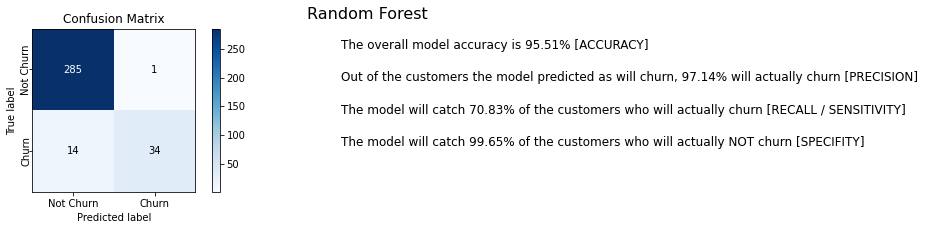

In [23]:
rf_clf = fine_tuner(clf=rf_clf, dataset=data, param_grid=parameters, scores=scores, splits=5, 
                    refit_score='recall_score', title='Random Forest')

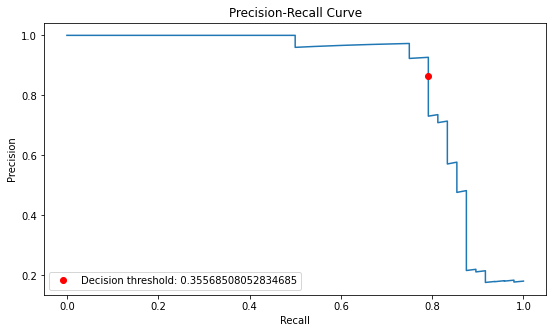

In [24]:
decision_threshold, predictions = operating_point_finder(rf_clf, test_data, test_target, 0.85)

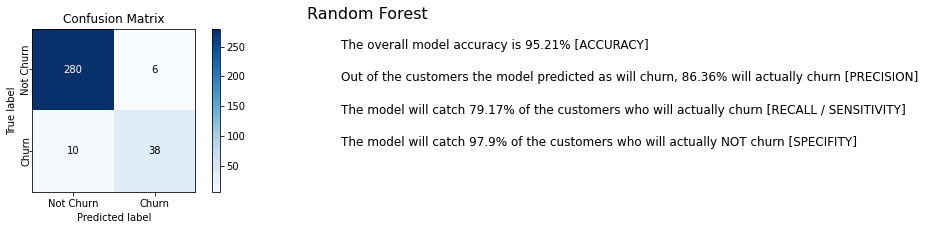

In [25]:
new_predictions=[1 if prediction >= decision_threshold else 0 for prediction in predictions]
labels = ['Not Churn','Churn']
plot_confusion_matrix(test_target, new_predictions, labels, 'Random Forest')

#### Gradient Boosting

In [26]:
gb_clf = GradientBoostingClassifier()

parameters = {
    'learning_rate': [0.1, 0.05, 0.01, 0.005, 0.001],
    'n_estimators': [100, 200, 300, 400, 500, 700],
    'min_samples_split': [3, 5, 10], 
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20]
}

In [27]:
gb_clf = fine_tuner(clf=gb_clf, dataset=data, param_grid=parameters, scores=scores, splits=5, 
                    refit_score='recall_score', title='Gradient Boosting')

KeyboardInterrupt: 

In [ ]:
decision_threshold, predictions = operating_point_finder(gb_clf, test_data, test_target, 0.85)

In [ ]:
new_predictions=[1 if prediction >= decision_threshold else 0 for prediction in predictions]
labels = ['Not Churn','Churn']
plot_confusion_matrix(test_target, new_predictions, labels, 'Gradient Boosting')

#### Extra Trees

In [ ]:
et_clf = ExtraTreesClassifier(n_jobs = -1)

parameters = {
    'min_samples_split': [3, 5, 10, 15], 
    'n_estimators' : [100, 200, 300, 400, 500, 700, 800],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20, 30]
}

In [ ]:
et_clf = fine_tuner(clf=et_clf, dataset=data, param_grid=parameters, scores=scores, splits=5, 
                    refit_score='recall_score', title='Extra Trees')

In [ ]:
decision_threshold, predictions = operating_point_finder(et_clf, test_data, test_target, 0.85)

In [ ]:
new_predictions=[1 if prediction >= decision_threshold else 0 for prediction in predictions]
labels = ['Not Churn','Churn']
plot_confusion_matrix(test_target, new_predictions, labels, 'Extra Trees')